In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [3]:
data_path = "../data/processed/readmission_clean.csv"
df = pd.read_csv(data_path)

df.shape


C:\Users\sbeer\AppData\Local\Temp\ipykernel_42412\2527526921.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


(101766, 46)

In [4]:
df.head()
df["readmitted_binary"].value_counts(normalize=True)


readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

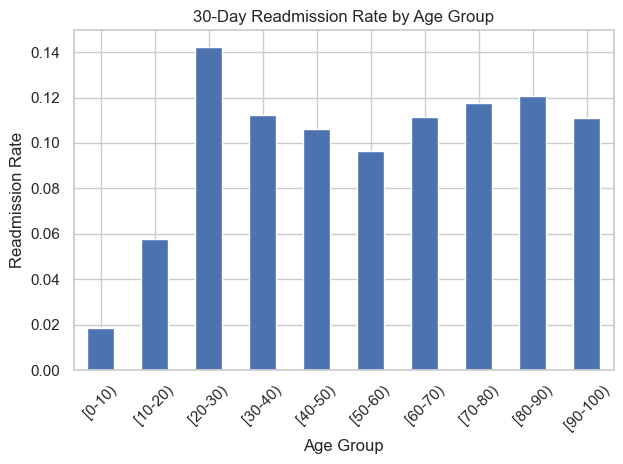

In [5]:
age_readmit = (
    df.groupby("age")["readmitted_binary"]
    .mean()
    .sort_index()
)

plt.figure()
age_readmit.plot(kind="bar")
plt.title("30-Day Readmission Rate by Age Group")
plt.ylabel("Readmission Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


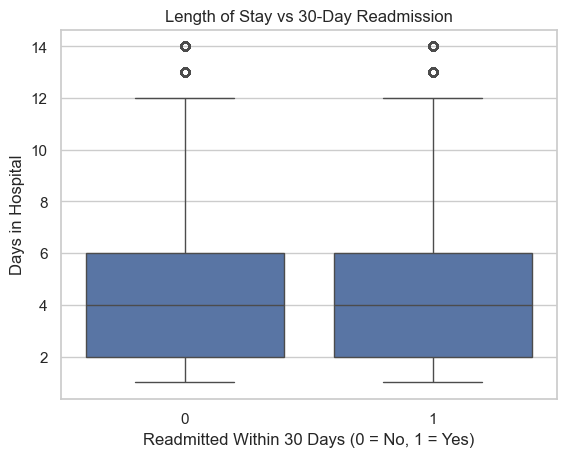

In [6]:
plt.figure()
sns.boxplot(
    x="readmitted_binary",
    y="time_in_hospital",
    data=df
)
plt.title("Length of Stay vs 30-Day Readmission")
plt.xlabel("Readmitted Within 30 Days (0 = No, 1 = Yes)")
plt.ylabel("Days in Hospital")
plt.show()


In [7]:
df.groupby("readmitted_binary")["time_in_hospital"].describe()


,count,mean,std,min,25%,50%,75%,max
readmitted_binary,,,,,,,,
0,90409.0,4.349224,2.976382,1.0,2.0,4.0,6.0,14.0
1,11357.0,4.768249,3.028165,1.0,2.0,4.0,6.0,14.0


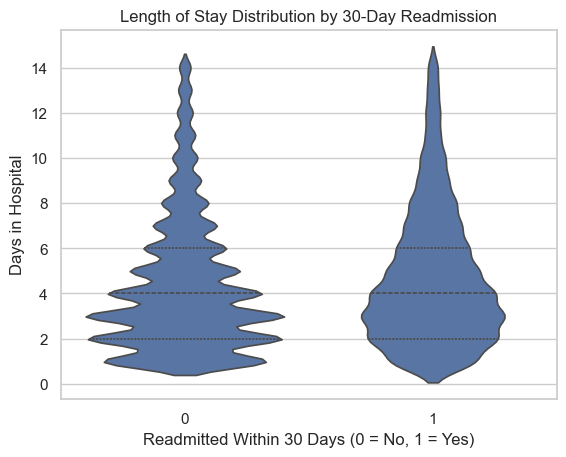

In [8]:
plt.figure()
sns.violinplot(
    x="readmitted_binary",
    y="time_in_hospital",
    data=df,
    inner="quartile"
)
plt.title("Length of Stay Distribution by 30-Day Readmission")
plt.xlabel("Readmitted Within 30 Days (0 = No, 1 = Yes)")
plt.ylabel("Days in Hospital")
plt.show()


In [9]:
util_cols = [
    "number_inpatient",
    "number_emergency",
    "number_outpatient"
]

df.groupby("readmitted_binary")[util_cols].mean()


,number_inpatient,number_emergency,number_outpatient
readmitted_binary,,,
0,0.561648,0.177803,0.360871
1,1.224003,0.357313,0.436911


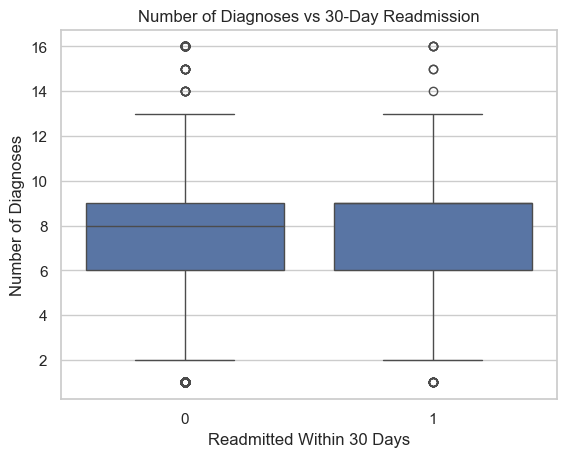

In [10]:
plt.figure()
sns.boxplot(
    x="readmitted_binary",
    y="number_diagnoses",
    data=df
)
plt.title("Number of Diagnoses vs 30-Day Readmission")
plt.xlabel("Readmitted Within 30 Days")
plt.ylabel("Number of Diagnoses")
plt.show()


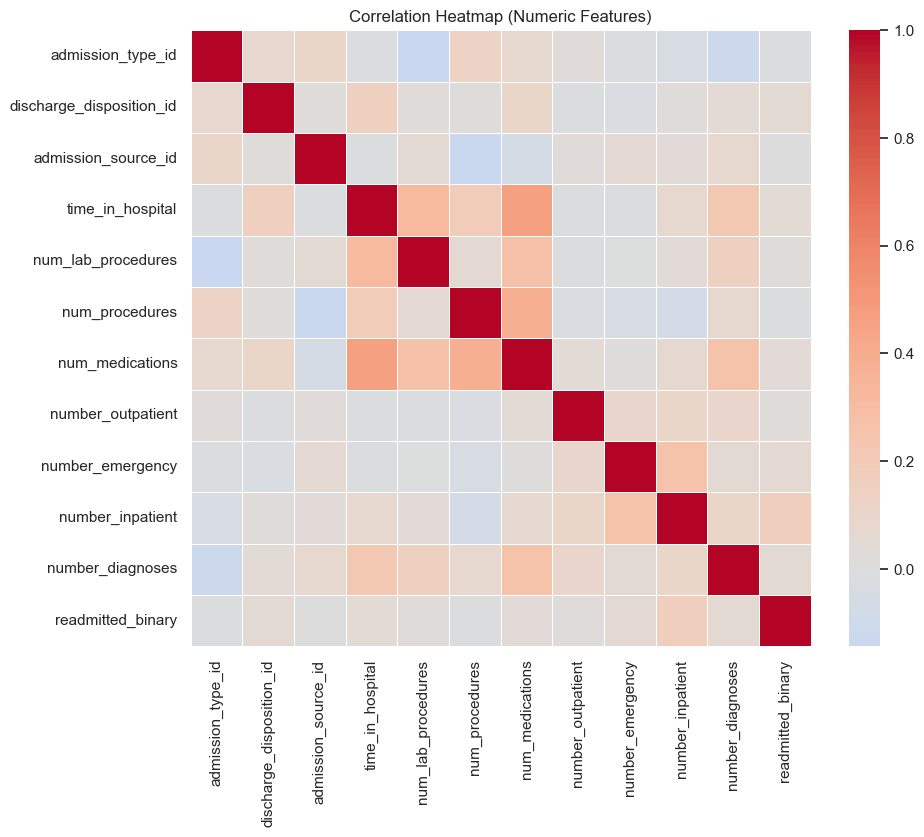

In [11]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])

corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Key EDA Findings
- Readmission rates increase with age

- Longer hospital stays are associated with higher readmission risk

- Patients with more prior inpatient visits are significantly more likely to be readmitted